In [26]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import sys
sys.path.append('..')

In [3]:
from tasks import *

input_dim=10
output_dim=10

sess = tf.InteractiveSession()

cell = NTMCell(input_dim=input_dim, output_dim=output_dim)
ntm = NTM(cell, sess, 1, 10, 20, forward_only=True)

ntm.load('../checkpoint', 'copy')

 [*] Building a NTM model
Percent: [####################] 100% Finished.
 [*] Build a NTM model finished
 [*] Reading checkpoints...


In [4]:
copy(ntm, 5, sess)

 true output : 
      ##  
   # # #  
  ##### # 
      #  #
  ##   ###
 predicted output :
      ##  
   # # #  
  ##### # 
      #  #
  ##   ###
 Loss : 0.000001


In [33]:
def plot(ntm, seq_length, sess):
    seq, outputs, read_w, write_w, loss = copy(ntm, seq_length, sess, print_=False)
    read_w[0] = np.squeeze(read_w[0])
    write_w[0] = np.squeeze(write_w[0])

    shape2 = list(np.array(outputs).shape)
    shape2[0] += 2

    shape3 = list(np.array(read_w).shape)
    shape3[0] += 2

    z1 = np.zeros_like(outputs)
    z2 = np.zeros(shape2)

    s1 = np.zeros_like(seq[0]); s1[0]=1
    s2 = np.zeros_like(seq[0]); s2[1]=1

    seq = [s1] + seq + [s2]

    seq = np.r_[np.array(seq), z1]
    outputs = np.r_[z2, outputs]

    if seq_length >= 50:
        plt.figure(1,figsize=(20,5))
    else:
        plt.figure(1,figsize=(20,7))

    plt.subplot(411)
    plt.imshow(seq.T, interpolation='nearest')
    plt.subplot(412)
    plt.imshow(outputs.T, interpolation='nearest')
    plt.subplot(413)
    plt.imshow(read_w[1:-1], cmap='Greys', interpolation='nearest')
    plt.subplot(414)
    plt.imshow(write_w, cmap='Greys', interpolation='nearest')

    print("Loss : %f" % loss)

Loss : 0.000002


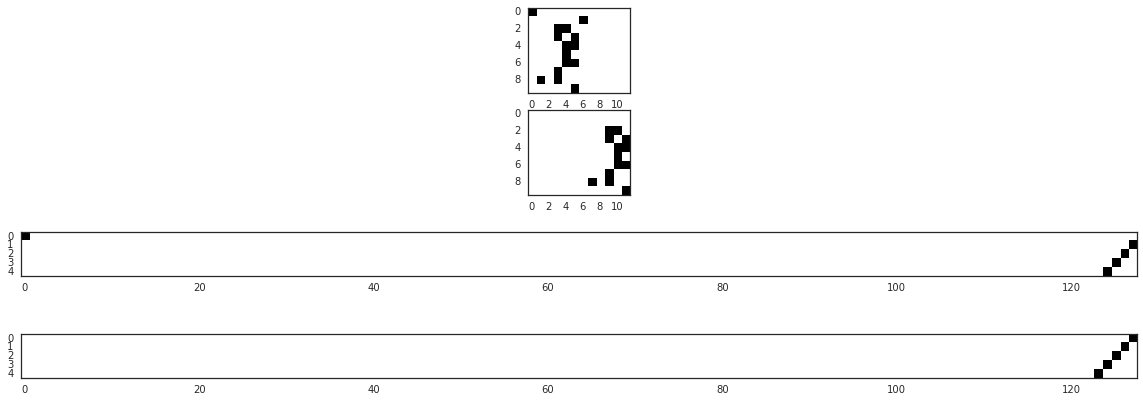

In [34]:
plot(ntm, 5, sess)

Loss : 0.000003


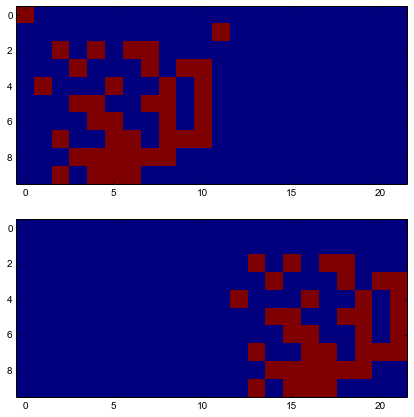

In [7]:
plot(ntm, 10, sess)

Loss : 0.000010


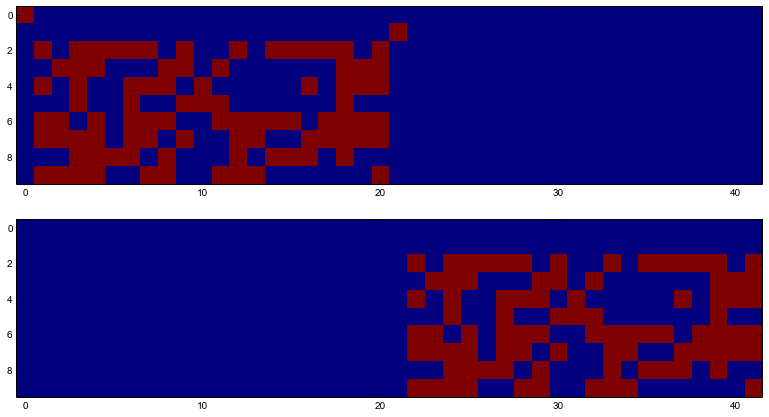

In [8]:
plot(ntm, 20, sess)

Loss : 0.000075


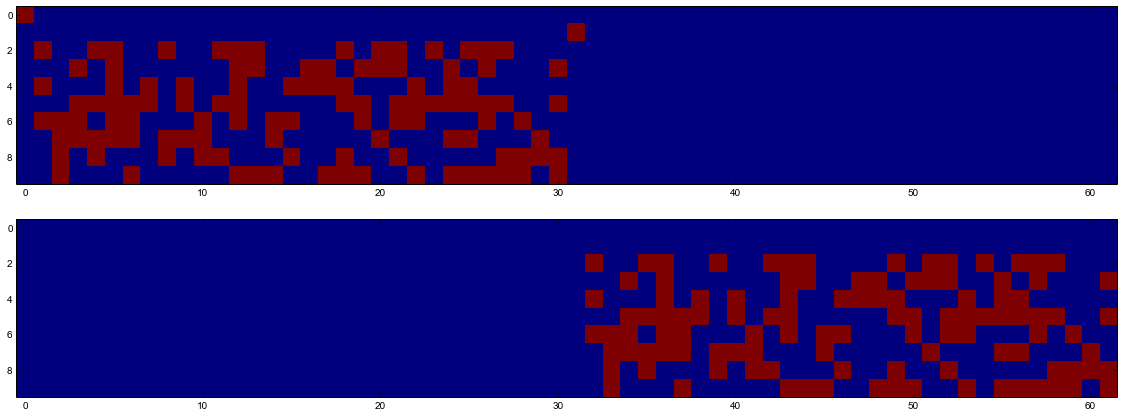

In [9]:
plot(ntm, 30, sess)

Loss : 0.012065


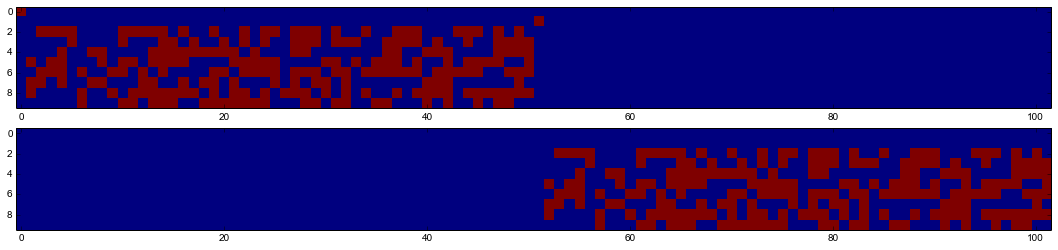

In [22]:
plot(ntm, 50, sess)

Loss : 7.548618


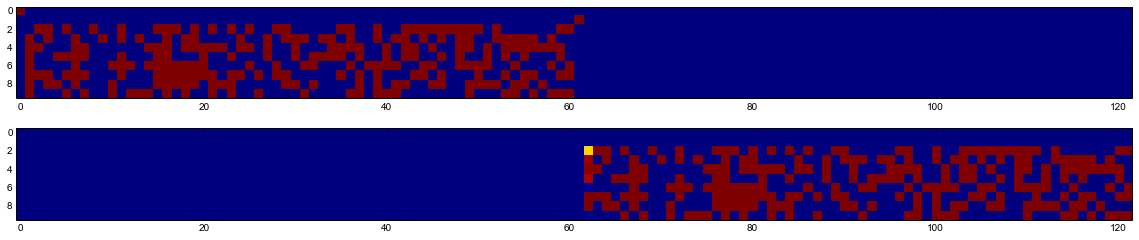

In [16]:
plot(ntm, 60, sess)

Loss : 737.201660


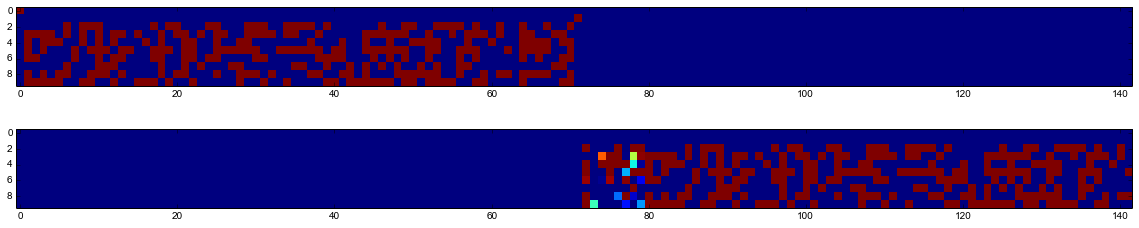

In [17]:
plot(ntm, 70, sess)

Loss : 823.394470


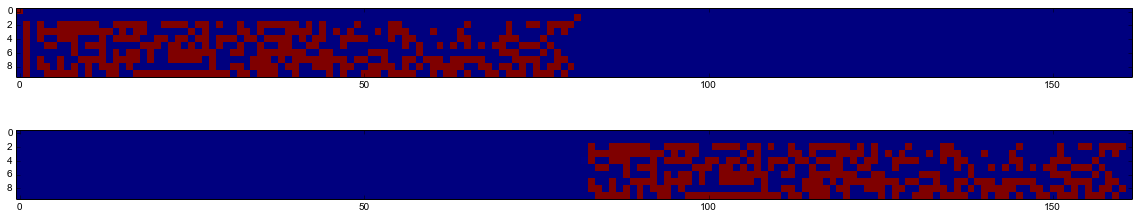

In [18]:
plot(ntm, 80, sess)

Loss : 1115.814453


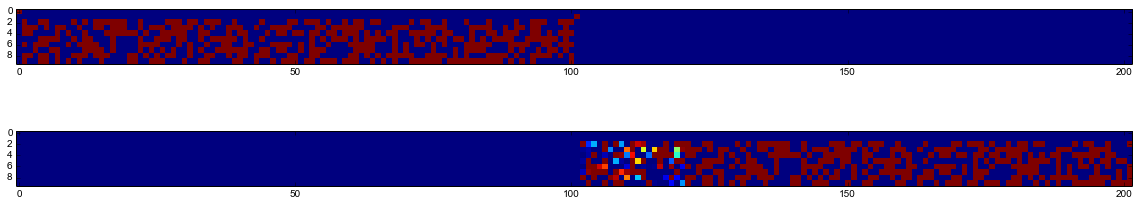

In [19]:
plot(ntm, 100, sess)

Loss : 0.000011


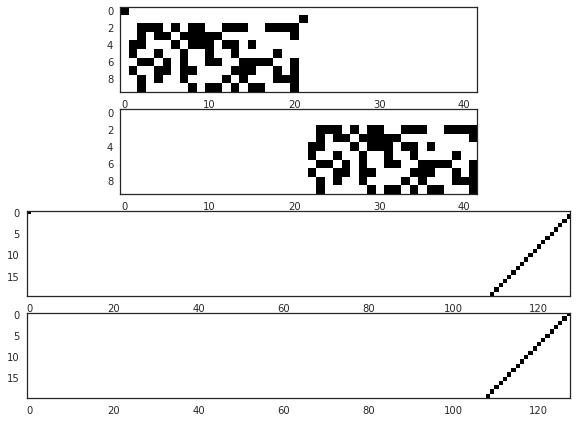

In [31]:
seq_length = 20

seq, outputs, read_w, write_w, loss = copy(ntm, seq_length, sess, print_=False)
read_w[0] = np.squeeze(read_w[0])
write_w[0] = np.squeeze(write_w[0])

shape2 = list(np.array(outputs).shape)
shape2[0] += 2

shape3 = list(np.array(read_w).shape)
shape3[0] += 2

z1 = np.zeros_like(outputs)
z2 = np.zeros(shape2)

s1 = np.zeros_like(seq[0]); s1[0]=1
s2 = np.zeros_like(seq[0]); s2[1]=1

seq = [s1] + seq + [s2]

seq = np.r_[np.array(seq), z1]
outputs = np.r_[z2, outputs]

if seq_length >= 50:
    plt.figure(1,figsize=(20,5))
else:
    plt.figure(1,figsize=(20,7))

plt.subplot(411)
plt.imshow(seq.T, interpolation='nearest')
plt.subplot(412)
plt.imshow(outputs.T, interpolation='nearest')
plt.subplot(413)
plt.imshow(read_w[1:-1], cmap='Greys', interpolation='nearest')
plt.subplot(414)
plt.imshow(write_w, cmap='Greys', interpolation='nearest')

print("Loss : %f" % loss)